**The development part:**

All the 4738 images were trained on a Autoencoder inorder to extract different features and learnings from the dataset. After that i encodede or reduced the dimensions of the image to certain features for calculating the distance between the image vectors (for this part i used K nearest neighbours algorithm). For computational reasons i reshaped the size of the image to 32*32

**EXECUTE ALL THE CODE SNIPPETS TILL THE END FOR RSULTS**

**The function which i was asked to design was coded in the last snippet, upload an image onto the notebbok for evaluating purpose**

In [ ]:
!gdown https://drive.google.com/uc?id=1VT-8w1rTT2GCE5IE5zFJPMzv7bqca-Ri&export=download

Downloading...
From: https://drive.google.com/uc?id=1VT-8w1rTT2GCE5IE5zFJPMzv7bqca-Ri
To: /content/dataset.zip
243MB [00:01, 134MB/s]


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/3604.jpg        
  inflating: dataset/3487.jpg        
  inflating: dataset/2902.jpg        
  inflating: dataset/1484.jpg        
  inflating: dataset/1175.jpg        
  inflating: dataset/246.jpg         
  inflating: dataset/3618.jpg        
  inflating: dataset/3763.jpg        
  inflating: dataset/2436.jpg        
  inflating: dataset/3248.jpg        
  inflating: dataset/1662.jpg        
  inflating: dataset/4282.jpg        
  inflating: dataset/2351.jpg        
  inflating: dataset/4385.jpg        
  inflating: dataset/2380.jpg        
  inflating: dataset/4651.jpg        
  inflating: dataset/2830.jpg        
  inflating: dataset/1846.jpg        
  inflating: dataset/1807.jpg        
  inflating: dataset/1536.jpg        
  inflating: dataset/2977.jpg        
  inflating: dataset/120.jpg         
  inflating: dataset/1103.jpg        
  inflating: dataset/1985.jpg        
  inflating: dataset/1706.jpg        
  infl

In [ ]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm

**Function for converting the data into numpy arrays as cnn algorithms expects a n dimensional numpy arrays as input**

In [ ]:
data=[]
path1 = '/content/dataset/'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,1)   # 1 for color images
    img=cv2.resize(img,(32, 32))
    data.append(img_to_array(img))
    


100%|██████████| 4738/4738 [00:17<00:00, 272.17it/s]


In [ ]:
len(data)

4738

In [ ]:
data[0].shape

(32, 32, 3)

**Reshaping the entire data in order to match with input of the encoder and noramilizing the data.**

In [ ]:
data_train = np.reshape(data, (len(data), 32, 32, 3))
data_train = data_train.astype('float32') / 255 - 0.5

In [ ]:
X_train, X_test = train_test_split(data_train, test_size=0.1, random_state=42)

In [ ]:
img_shape = X_train.shape[1:]
print(img_shape)

(32, 32, 3)


In [ ]:
import tensorflow as tf
import keras, keras.layers as L, keras.backend as K
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from keras.models import save_model
import keras

In [ ]:
def build_deep_autoencoder(img_shape, code_size):
    H,W,C = img_shape
    
    # encoder
    encoder = keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))
    
    encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Flatten())                  
    encoder.add(L.Dense(code_size)) 


    # decoder
    decoder = keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))
    
    decoder.add(L.Dense(2*2*256))  #actual decoder, height*width*3 units
    decoder.add(L.Reshape((2,2,256)))
    decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))
    
    return encoder, decoder

**code size is an hyperparameter which varies from 4 to whatever size you take, ideally i took 32**

In [ ]:
encoder, decoder = build_deep_autoencoder(img_shape, code_size=32)
encoder.summary()
decoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

In [ ]:
inp = L.Input(img_shape)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='mse')

In [ ]:
autoencoder.fit(x=X_train, y=X_train, epochs=25,
                validation_data=[X_test, X_test],
                callbacks=None)

Epoch 1/25
134/134 [==============================] - 1s 7ms/step - loss: 0.0351 - val_loss: 0.0000e+00
Epoch 2/25
134/134 [==============================] - 1s 5ms/step - loss: 0.0271 - val_loss: 0.0000e+00
Epoch 3/25
134/134 [==============================] - 1s 5ms/step - loss: 0.0253 - val_loss: 0.0000e+00
Epoch 4/25
134/134 [==============================] - 1s 5ms/step - loss: 0.0241 - val_loss: 0.0000e+00
Epoch 5/25
134/134 [==============================] - 1s 5ms/step - loss: 0.0234 - val_loss: 0.0000e+00
Epoch 6/25
134/134 [==============================] - 1s 5ms/step - loss: 0.0229 - val_loss: 0.0000e+00
Epoch 7/25
134/134 [==============================] - 1s 5ms/step - loss: 0.0225 - val_loss: 0.0000e+00
Epoch 8/25
134/134 [==============================] - 1s 5ms/step - loss: 0.0223 - val_loss: 0.0000e+00
Epoch 9/25
134/134 [==============================] - 1s 5ms/step - loss: 0.0222 - val_loss: 0.0000e+00
Epoch 10/25
134/134 [==============================] - 1s 5ms/st

In [ ]:
images = X_train
codes = encoder.predict(images) 
assert len(codes) == len(images)

**After converting all our images into vectors we can find the similar images by calculating the euclidean distace/cosine similarity between the given image vector and the remaining images vectors. I used K Nearest Neighbhours.**

In [ ]:
from sklearn.neighbors.unsupervised import NearestNeighbors
nei_clf = NearestNeighbors(metric="euclidean")
nei_clf.fit(codes)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
def get_similar(image, n_neighbors=5):
    assert image.ndim==3,"image must be [batch,height,width,3]"

    code = encoder.predict(image[None])
    
    (distances,),(idx,) = nei_clf.kneighbors(code,n_neighbors=n_neighbors)
    
    return distances,images[idx]

In [ ]:
def show_similar(image):
    
    distances,neighbors = get_similar(image,n_neighbors=3)
    
    plt.figure(figsize=[8,7])
    plt.subplot(1,4,1)
    show_image(image)
    plt.title("Original image")
    
    for i in range(3):
        plt.subplot(1,4,i+2)
        show_image(neighbors[i])
        plt.title("Dist=%.3f"%distances[i])
    plt.show()

In [ ]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

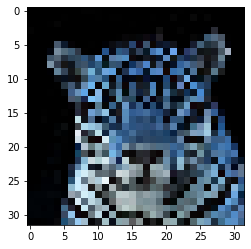

In [ ]:
show_image(X_test[40])

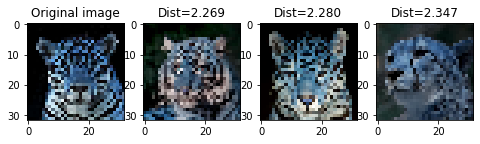

In [ ]:
show_similar(X_test[40])

**Custom function for passing images of any size and it will return similar images**

In [ ]:
path = '/content/6.jpg' #image path
def passImage(path):

  img=cv2.imread(path,1) 
  img=cv2.resize(img,(32, 32))
  img = img_to_array(img)
  img = img/255.0 - 0.5
  return show_similar(img)




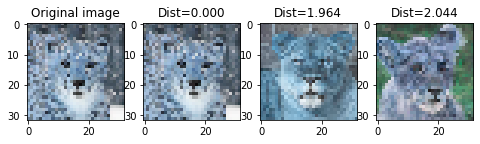

In [ ]:
passImage(path)